In [1]:
import tensorflow as tf

using_gpu_index = 0 # 使用的 GPU 号码
gpu_list = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_virtual_device_configuration(
        gpu_list[using_gpu_index],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 4)]
    )

2023-10-16 18:01:48.766837: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-16 18:01:48.773569: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-16 18:01:48.773778: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
import cirq
import models.quantum_genotypes as genotypes

from models.quantum_models import generate_model_policy
from functools import reduce

env_name = "CartPole-v1"
qubits = cirq.GridQubit.rect(1, 4)
genotype = genotypes.ORI_TYPE_CP
n_actions = 2  # Number of actions in CartPole

ops = [cirq.Z(q) for q in qubits]
observables = [reduce((lambda x, y: x * y), ops)]  # Z_0*Z_1*Z_2*Z_3
# generate_model_policy(qubits, genotype, n_actions, beta, observables, env):
model = generate_model_policy(qubits, genotype, n_actions, 1., observables, env_name, using_H=True)

CartPole-v1


In [5]:
from models.value_net import ValueNet

In [6]:
from IPython.core.display import HTML
from models.quantum_models import generate_circuit

circuit, params, inputs = generate_circuit(qubits, genotype, using_H=True)
display(HTML(f"<pre>{circuit}</pre>"))

In [7]:
from tensorflow.keras.optimizers import Adam
import gym
env_name = "CartPole-v1"
env = gym.make(env_name)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
# hidden_dim = 64

# device = torch.device("cpu")

actor = model

critic = ValueNet()  # 价值网络
# 广义优势估计（Generalized Advantage Estimation，GAE）
# gamma 是GAE的超参数
gamma = 0.98

# lmbda 也用来计算广义优势估
lmbda = 0.95

epochs = 10  # 一条序列的数据用来训练轮数 4
eps = 0.2  # 裁剪超参数
# actor_lr = 1e-3
critic_lr = 1e-2  # 结合 量子电路后 这个变得重要了起来
# critic_lr = 1e-1  # 结合 量子电路后 这个变得重要了起来
# critic_lr = 2.5e-4 #

# actor_optimizer = Adam(learning_rate=actor_lr)

optimizer_in = Adam(learning_rate=0.1, amsgrad=False, epsilon=1e-5)
optimizer_var = Adam(learning_rate=0.01, amsgrad=False, epsilon=1e-5)
optimizer_out = Adam(learning_rate=0.1, amsgrad=False, epsilon=1e-5)

# Assign the model parameters to each optimizer
w_in, w_var, w_out = 1, 0, 2

# critic_optimizer = Adam(learning_rate=critic_lr)
critic_optimizer = Adam(learning_rate=critic_lr, amsgrad=False, epsilon=1e-5)  # 这个不知道 似乎作用有限

In [8]:
from misc.utils import train

In [9]:
import numpy as np

state_bounds = np.array([2.4, 2.5, 0.21, 2.5])
state_ub = state_bounds
state_lb = -1 * state_bounds

In [10]:
return_list = train(env_name, actor, critic, gamma, lmbda, eps, epochs,
          optimizer_in, optimizer_var, optimizer_out, critic_optimizer, 500.,
          critic_normalized=True, state_ub=state_ub, state_lb=state_lb, num_episodes=1000)

当前迭代次数为：0, 当前奖励为：18.0, 平均奖励为：18.0
当前迭代次数为：1, 当前奖励为：18.0, 平均奖励为：18.0
当前迭代次数为：2, 当前奖励为：81.0, 平均奖励为：39.0
当前迭代次数为：3, 当前奖励为：72.0, 平均奖励为：47.25
当前迭代次数为：4, 当前奖励为：97.0, 平均奖励为：57.2
当前迭代次数为：5, 当前奖励为：185.0, 平均奖励为：78.5
当前迭代次数为：6, 当前奖励为：122.0, 平均奖励为：84.71428571428571
当前迭代次数为：7, 当前奖励为：72.0, 平均奖励为：83.125
当前迭代次数为：8, 当前奖励为：76.0, 平均奖励为：82.33333333333333
当前迭代次数为：9, 当前奖励为：244.0, 平均奖励为：98.5
当前迭代次数为：10, 当前奖励为：233.0, 平均奖励为：120.0
当前迭代次数为：11, 当前奖励为：247.0, 平均奖励为：142.9
当前迭代次数为：12, 当前奖励为：208.0, 平均奖励为：155.6
当前迭代次数为：13, 当前奖励为：194.0, 平均奖励为：167.8
当前迭代次数为：14, 当前奖励为：361.0, 平均奖励为：194.2
当前迭代次数为：15, 当前奖励为：278.0, 平均奖励为：203.5
当前迭代次数为：16, 当前奖励为：141.0, 平均奖励为：205.4
当前迭代次数为：17, 当前奖励为：172.0, 平均奖励为：215.4
当前迭代次数为：18, 当前奖励为：236.0, 平均奖励为：231.4
当前迭代次数为：19, 当前奖励为：144.0, 平均奖励为：221.4
当前迭代次数为：20, 当前奖励为：181.0, 平均奖励为：216.2
当前迭代次数为：21, 当前奖励为：175.0, 平均奖励为：209.0
当前迭代次数为：22, 当前奖励为：177.0, 平均奖励为：205.9
当前迭代次数为：23, 当前奖励为：101.0, 平均奖励为：196.6
当前迭代次数为：24, 当前奖励为：98.0, 平均奖励为：170.3
当前迭代次数为：25, 当前奖励为：77.0, 平均奖励为：150.2
当前迭代次数为：26, 当前奖励为：116.0, 平均奖励为：147.7
当

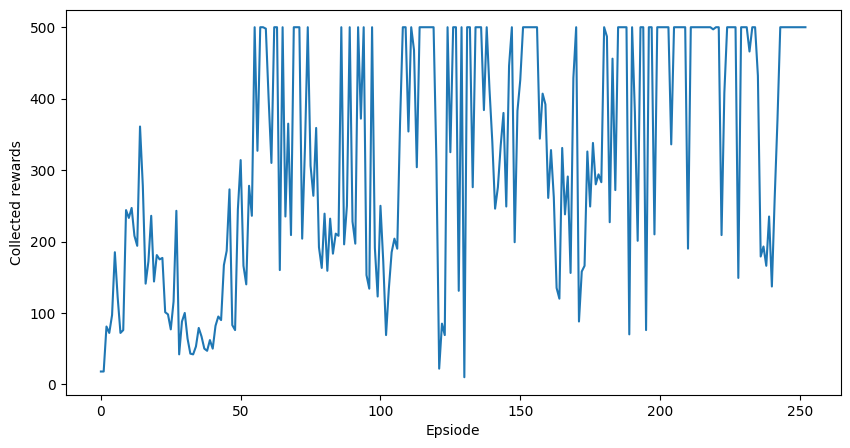

In [11]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(return_list)
plt.xlabel('Epsiode')
plt.ylabel('Collected rewards')
plt.show()

In [18]:
import pandas as pd

# 创建一个DataFrame对象
df = pd.DataFrame({'return_list': return_list})

# 将DataFrame保存到CSV文件
df.to_csv('../../../../results/example/ppo/ppo_quafu/all_state_normalize/return_list_CP', index=False)  # 可以指定文件名和是否包括行索引
actor.save_weights('../../../../weights/example/ppo/ppo_quafu/all_state_normalize/weights_CP_ACTOR_amsgrad.h5')
critic.save_weights('../../../../weights/example/ppo/ppo_quafu/all_state_normalize/weights_CP_CRITIC_amsgrad.h5')